<h1 align="center">Spotify Genre Classifier Using Machine Learning</h1>

<h4 align="center">University of Tehran</h4>

<h2>EDA and Visualization</h2>

<h3>Introduction</h3>
<br>
Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis

<h3>Import necessary dependencies</h3>

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import gc
import warnings
warnings.filterwarnings("ignore")

In [46]:
train_set = pd.read_csv('dataset.csv')

<h3>Understand data set attributes</h3>

In [47]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [4]:
train_set.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


In [5]:
train_set.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.159,-7.429,Major,0.0382,142.065,0.607,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.127,-10.147,Major,0.1840,79.969,0.287,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.265,-7.080,Minor,0.0378,NaN,0.636,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.139,-15.542,Major,0.0346,82.707,0.206,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.306,-6.625,Major,0.0630,104.694,0.383,Jazz


<h3>Understand Songs feautures and properties</h3>

**Artist Name**: The name of the song's artist. <br>
**Track Name**: The name of the song.<br>
**Popularity**: Popularity of the song, the more the number is, the more it is popular.<br>
**Acousticness**: How accoustic the song is.<br>
**Danceability**: How dancable the song is.<br>
**Duration_ms**: Song's duration in ms.<br>
**Energy**: Song's energy.<br>
**Instrumentalness**: How instrumental the song is.<br>
**Key**: Which key is the bold one in the songs.<br>
**Liveness**: the name of the song<br>
**Loudness**: Song's energy.<br>
**Mode**: How instrumental the song is.<br>
**Speechiness**: Which key is the bold one in the songs.<br>
**Tempo**: the name of the song<br>
**Valence**: Song's energy.<br>
**Music Genre**: How instrumental the song is.<br>


In [6]:
missing_data_percent = train_set.isnull().sum() * 100 / len(train_set)
missing_data_percent

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

<h2> Distribution Plots </h2>

<h3>Histogram and KDE Plot</h3>

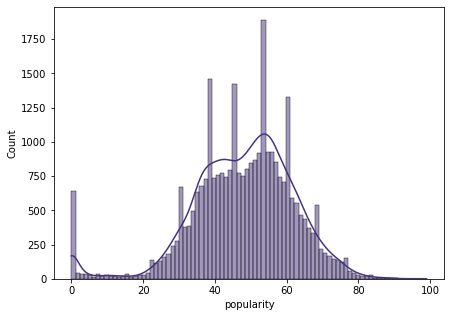

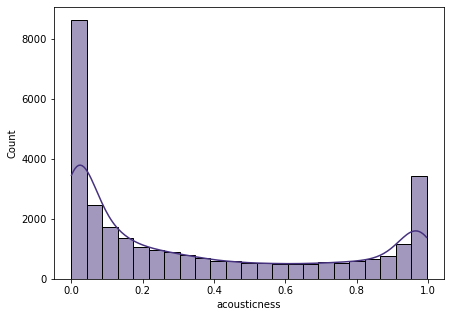

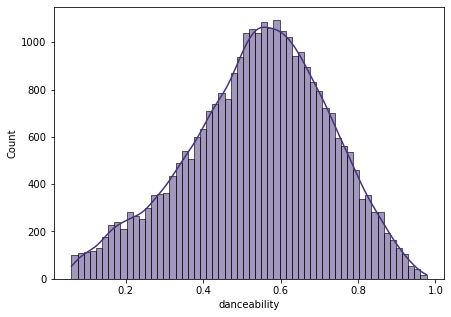

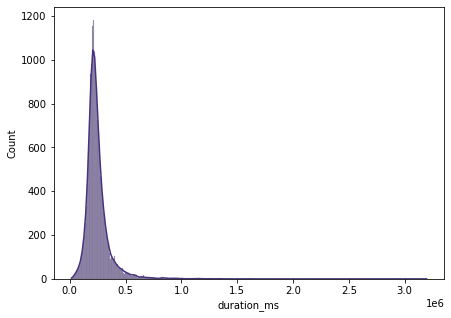

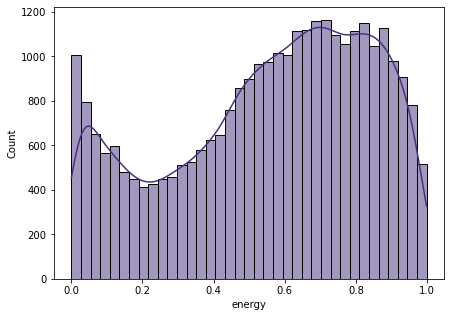

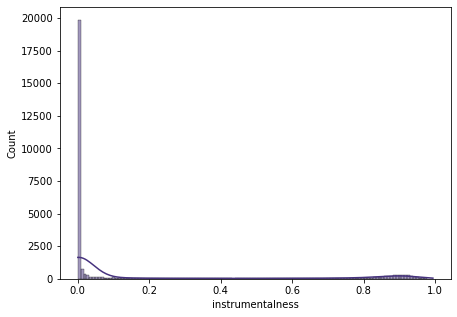

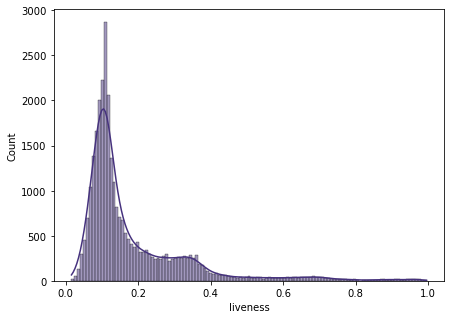

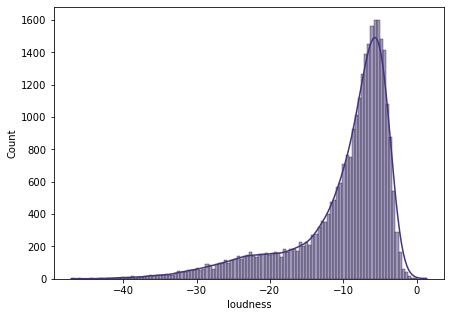

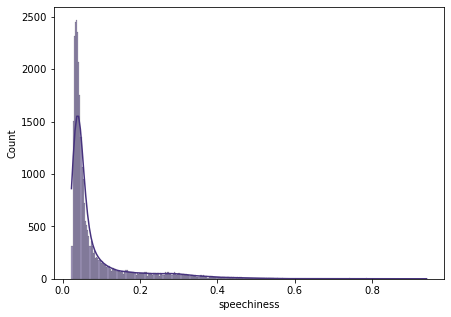

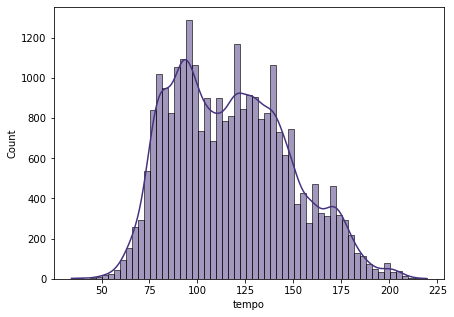

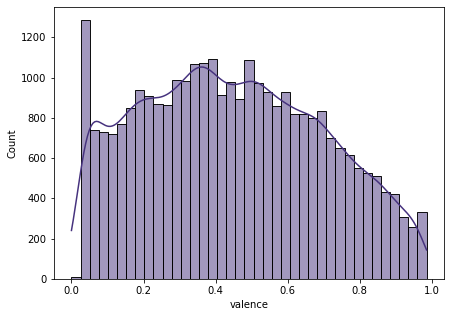

In [121]:
for col in train_set.select_dtypes('float'):
    plt.figure(figsize=(7,5))
    sns.set_palette('viridis')
    sns.histplot(train_set[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


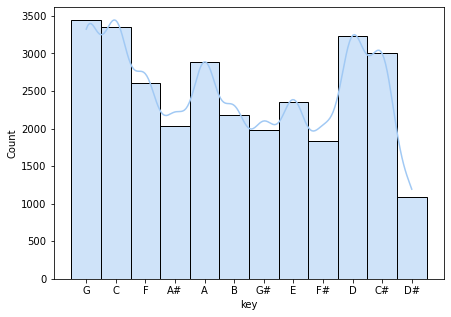

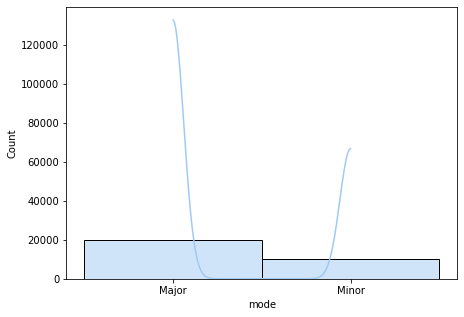

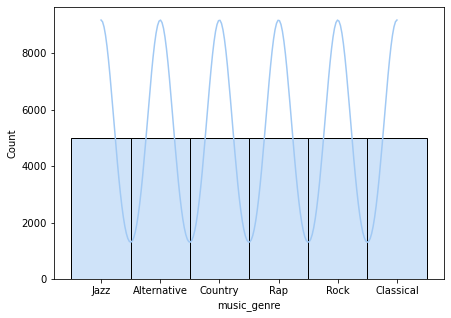

In [120]:
for col in train_set.select_dtypes('object'):
    if col not in ['artist_name', 'track_name']:
        plt.figure(figsize=(7,5))
        sns.set_palette('pastel')
        sns.histplot(x=col, data=train_set, kde=True)
        plt.show()

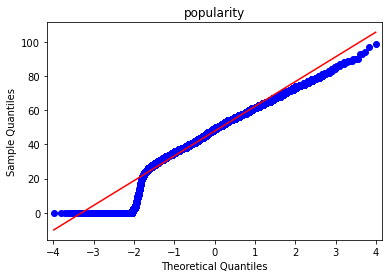

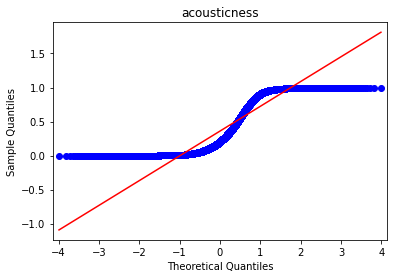

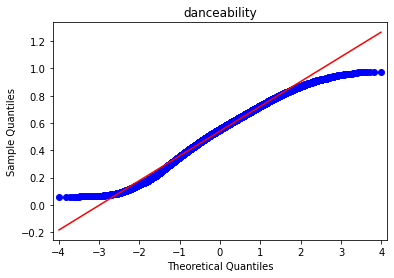

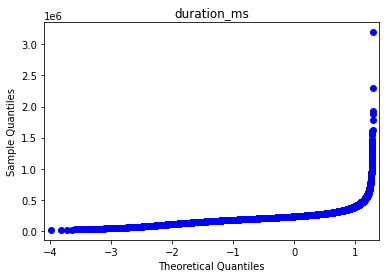

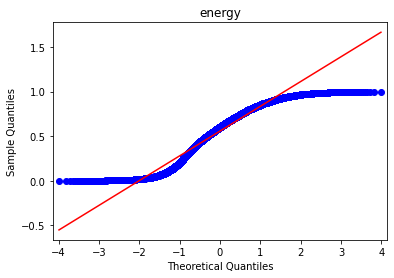

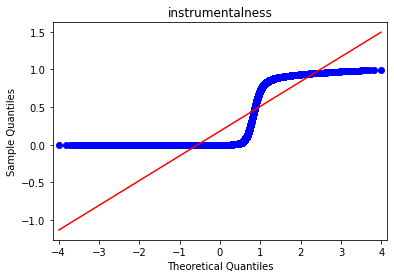

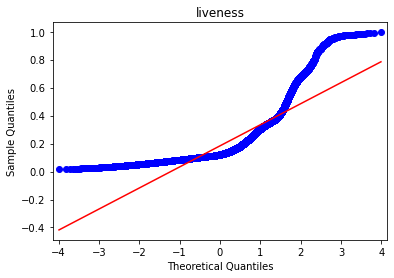

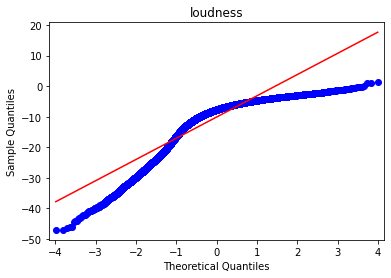

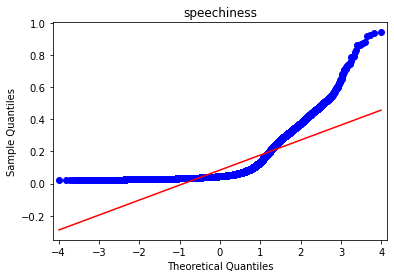

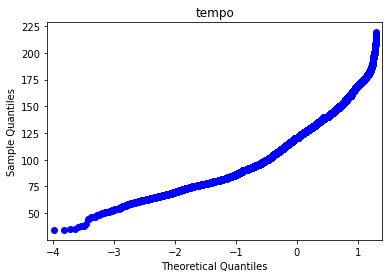

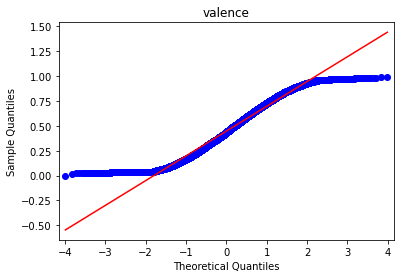

In [137]:
for col in train_set.select_dtypes('float'):
    sm.qqplot(train_set[col], line='s')
    plt.title(col)
    plt.show()

*As you can see here, most of our numerical datas are following* **Normal Distribution.**


<h2>Data Pre-Processing</h2>
<h3>What is Data Pre-Processing and Why is it Important?

Data preprocessing is the process of transforming raw data into an understandable format.

Preprocessing of data is mainly to check the data quality.
<br> The *quality* can be checked by the following:

- **Accuracy**: To check whether the data entered is correct or not.
- **Completeness**: To check whether the data is available or not recorded.
- **Consistency**: To check whether the same data is kept in all the places that do or do not match.
- **Timeliness**: The data should be updated correctly.
- **Believability**: The data should be trustable.
- **Interpretability**: The understandability of the data.

Data processing tasks:
1. Data cleaning
2. Data integration
3. Data reduction
4. Data transformation

<h3>Data Cleaning</h3>

Data cleaning is the process to:
- remove incorrect data
- incomplete data
- inaccurate data from the datasets
- replaces the missing values

<h3>Handling Missing Values</h3>

<h4>Types of Missing Values</h4>
<br>

Formally the missing values are categorized as follows:
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing not at Random (MNAR)
<br>

<h4>Why Do We Need to Handle Missing Datas?</h4>
<br>

- Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
- You may end up building a biased machine learning model which will lead to incorrect results if the missing values are not handled properly.
- Missing data can lead to a lack of precision in the statistical analysis.
<br>

<h4>Handle Missing Values Techniques</h4>
<br>

1. Deletions
    - **Pairwise Deletion**
        - A case is dropped if it has some missing values.
        - **Advantages**: Maximizes all data available by an analysis by analysis basis.
        - **Disadvantages**: If the data mechanism is MAR, pairwise deletion will yield biased estimates
    - **Listwise Deletion/ Dropping rows**
        - A case is dropped if at least one of the values are missed.
        - **Advantages**: It is easy to implement and is the default in many statistical packages.
        - **Disadvantages**: It reduces the sample which is being statistically analysed.
2. Basic Imputation Techniques
    - **Imputation with a constant value**
        - It replaces data with a constant value.
        - **Advantages**: It is easy to implement.
        - **Disadvantages**: It can give an unbiased estimation.
    - **Imputation using the statistics (mean, median, mode)**
        -  Impute the missing values with a measure of central tendency — ie., mean, median, or mode.
        - **Advantages**: No loss of data points and statistical consistency.
        - **Disadvantages**: Possibility of skewing data without a strong central tendency
    - **K-Nearest Neighbor Imputation**
        - Identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.
        - **Advantages**: The missing data treatment is independent of the learning algorithm used
        - **Disadvantages**:
            - Does not work well with large dataset as calculating distances between each data instance would be very costly.
            - Sensitive to noisy and missing data.
3. Predict Values
    - **Linear Regression**
        - The variable with missing data is used as the dependent variable. Cases with complete data for the predictor variables are used to generate the regression equation; the equation is then used to predict missing values for incomplete cases.
        - **Advantages**: It takes into account the relationship between variables, unlike the mean/median imputation
        - **Disadvantages**: it overestimates the model fit and the correlation between the variables, as it does not take into account the uncertainty in the missing data and underestimates variances and covariances.
    - **Random Forests Regression**
        - Random forest (RF) missing data algorithms are an attractive approach for imputing missing data. They have the desirable properties of being able to handle mixed types of missing data, they are adaptive to interactions and nonlinearity, and they have the potential to scale to big data settings.
        - **Advantages**:
            - Random Forests can hold mixed-type of data
            - Miss Forest can handle outliers, so there is no need for feature scaling.
            - Random Forests have inherent feature selection, which makes them robust to noisy data.
            - It can handle non-linearity in data
        - **Disadvantages**: it reduces the sample which is being statistically analysed.
            - Multiple trees need to be constructed for each iteration, and it becomes computationally expensive when the number of predictors and observations increases.
            - Also, it’s an algorithm, not a model object, meaning it must be run every time data is imputed, which could be problematic in some production environments.
<br>    


<h4> Filling Missing Numerical Values with mean() </h4>

In [8]:
for col in train_set.select_dtypes('float'):
    train_set[col].fillna(value=train_set[col].mean(), inplace=True)

<h4> Filling Missing Categorical Values with most frequent value </h4>

In [12]:
train_set = train_set.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       30000 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       30000 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             30000 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

<h3>Scaling Methods</h3>

The two most common scaling methods are **Normalization** and **Standardization**

<h5>Normalization</h5>

**Normalization or Min-Max Scaling** is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. 
<br>

<h5>Standardization</h5>

**Standardization or Z-Score Normalization**  is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

<h5>Normalization vs. Standardization</h5>

- **Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- **Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

*You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.*

**NOTE** Since we decided that our numerical datas are following normal distribution then we're gonna use **standardization** for our scaling method.

In [55]:
scale= StandardScaler()
X_data = train_set.drop(['music_genre', 'artist_name', 'key', 'track_name', 'mode'], axis=1, inplace=False)
scaled_data = pd.DataFrame(scale.fit_transform(X_data))


<h3>How to Work with Categorical Values</h3>

Machine learning models require all input and output variables to be numeric and this means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
The two most popular techniques are:
- **Ordinal Encoding**
    - The number of possible values is often limited to a fixed set.
    - Each unique category value is assigned an integer value.
    - The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
- **One-Hot Encoding**
    - For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.
    - This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.
- **Binary Encoding**
    - Binary encoding is a combination of Hash encoding and one-hot encoding.
    - Binary encoding works really well when there are a high number of categories.
    
**NOTE** Since we have a lot of artist names we're gonna use **Binary Encoding** here

In [44]:
binary_encoder = ce.BinaryEncoder(cols=['artist_name', 'key']).fit(train_set)
train_set = binary_encoder.transform(train_set)
train_set.head()

,artist_name_0,artist_name_1,artist_name_2,artist_name_3,artist_name_4,artist_name_5,artist_name_6,artist_name_7,artist_name_8,artist_name_9,...,key_1,key_2,key_3,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.159,-7.429,Major,0.0382,142.065,0.607,Jazz
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.127,-10.147,Major,0.1840,79.969,0.287,Jazz
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.265,-7.080,Minor,0.0378,NaN,0.636,Jazz
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0.139,-15.542,Major,0.0346,82.707,0.206,Jazz
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.306,-6.625,Major,0.0630,104.694,0.383,Jazz
